In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# read files
globulars = pd.read_fwf("galactic.glob.dat")
opens = pd.read_fwf("galactic.open.dat")

In [ ]:
# remove the first row which is units, and reset indecies
globulars.drop([0], inplace=True)
opens.drop([0], inplace=True)

globulars.reset_index(drop=True,inplace=True)
opens.reset_index(drop=True,inplace=True)

In [ ]:
# Convert object dtypes to float
globulars.LONGITUDE = pd.to_numeric(globulars.LONGITUDE, errors="coerce")
globulars.LATITUDE = pd.to_numeric(globulars.LATITUDE, errors="coerce")
opens.GALLONG = pd.to_numeric(opens.GALLONG, errors="coerce")
opens.GALLAT = pd.to_numeric(opens.GALLAT, errors="coerce")

In [ ]:
# Change the range for longitude to be -180 degree to 180 degree
new_glob = np.where(globulars.LONGITUDE<=180, globulars.LONGITUDE,  globulars.LONGITUDE-360)
new_open = np.where(opens.GALLONG<=180, opens.GALLONG,  opens.GALLONG-360)

globulars.LONGITUDE = new_glob
opens.GALLONG = new_open

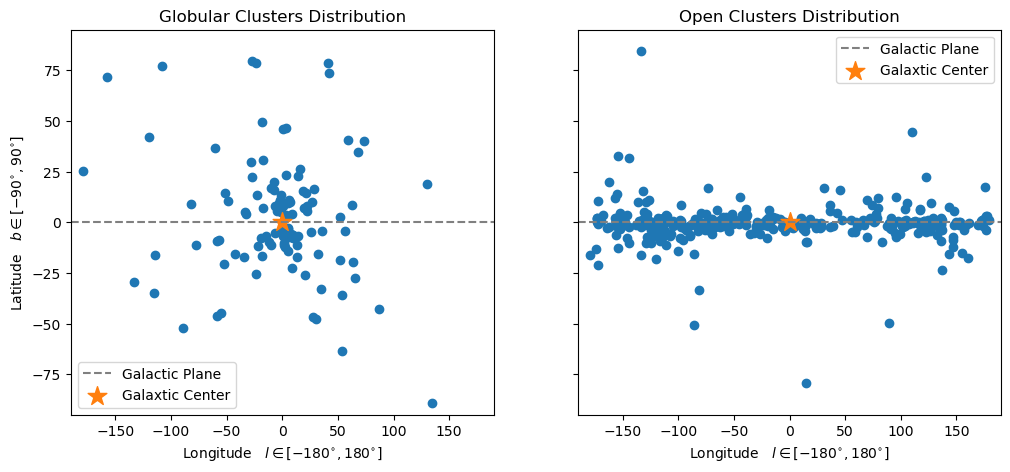

In [130]:
# plot next to each other
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 5),sharey=True,sharex=True)

ax1.scatter(globulars.LONGITUDE, globulars.LATITUDE)
ax2.scatter(opens.GALLONG, opens.GALLAT)
ax1.set_ylabel(r"Latitude   $b \in [-90^{\circ},90^{\circ}]$")
ax1.set_xlabel(r"Longitude   $l \in [-180^{\circ},180^{\circ}]$")
ax2.set_xlabel(r"Longitude   $l \in [-180^{\circ},180^{\circ}]$")


ax1.axhline(y=0,linestyle="--", color="gray", label="Galactic Plane")
ax2.axhline(y=0,linestyle="--", color="gray", label="Galactic Plane")
ax1.scatter(0,0,marker="*", s=200, label="Galaxtic Center")
ax2.scatter(0,0,marker="*", s=200, label="Galaxtic Center")

ax1.set_xlim(-190,190)
ax1.set_ylim(-95,95)

ax1.set_title("Globular Clusters Distribution")
ax2.set_title("Open Clusters Distribution")

ax1.legend()
ax2.legend()
plt.show()

## Discussion

Compared to globular clusters, open clusters are much more concentrated around the galactic plane and is distributed almost horizontally. In contrast, gloobular clusters are scatted more spatially, although they are more abandoned towards the galactic center. The alignment between galactic plan and open clusters indicates that most open clusters form in the galaxy because the glactic plane is where most dust and stars are located. Globular clusters on the other hand seem to have formed outside of the galaxy but became gravitationally bounded later.